<a href="https://colab.research.google.com/github/esha20/ML_DL/blob/main/cifar_10_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras import layers
from keras import models 
from keras.layers import *
import matplotlib.pyplot as plt

In [2]:
n=keras.datasets.cifar10

In [3]:
(train,target_t),(test, target_te)=n.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
train.shape

(50000, 32, 32, 3)

In [5]:
test.shape

(10000, 32, 32, 3)

In [6]:
#channel is present for both.

In [7]:
model=models.Sequential()
model.add(Conv2D(64,kernel_size=(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(128,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256,kernel_size=(5,5),activation='relu'))
model.add(Flatten())

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 256)         819456    
                                                                 
 flatten (Flatten)           (None, 256)               0

In [9]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(512,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 256)         819456    
                                                                 
 flatten (Flatten)           (None, 256)               0

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [14]:
h=model.fit(train,target_t,epochs=50,validation_data=(test,target_te))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6679 - accuracy: 0.7689 - val_loss: 2.2344 - val_accuracy: 0.4585
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6219 - accuracy: 0.7837 - val_loss: 2.3464 - val_accuracy: 0.4785
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6073 - accuracy: 0.7916 - val_loss: 2.3080 - val_accuracy: 0.4732
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5714 - accuracy: 0.8034 - val_loss: 2.6508 - val_accuracy: 0.4528
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5388 - accuracy: 0.8151 - val_loss: 2.6031 - val_accuracy: 0.4662
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5123 - accuracy: 0.8256 - val_loss: 2.6971 - val_accuracy: 0.4657
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5021 - accuracy: 0.8302 - val_loss: 2.4842 - val_accuracy:

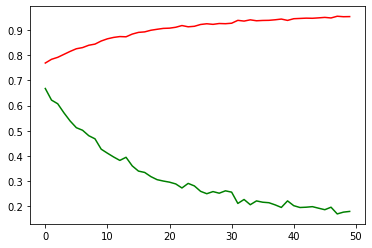

In [16]:
h.history.keys()
a=h.history['accuracy']
l=h.history['loss']
plt.plot(a,'r-')
plt.plot(l,'g-')